# The Steps involved in solving a problem in Deep Learning



1. Environment Setup: Import Necessary packages 
2. Loading of Input: Data importing and Exploration, Preprocessing
3. Split the data into two parts: "Training images and Testing images"
4. Building a Deep learningModel:Using appropriate algorithm,Train the model with training image, and saving the model with weights.
5. Model Evaluation: Getting Accuracy for the predicted model 
6. Finally observing the model with testing image to get final prediction.


### (1) Environment Setup

- **listdir**- To get the list of all files and directories in the specified 
- **time**- This function returns the number of seconds passed since epoch
- **cv2**- Loads an image from the specified file
- **tensorflow**- TensorFlow is a free and open-source software library for dataflow and differentiable programming across a range of tasks.
- **shuffle**- The shuffle() method takes a sequence (list, string, or tuple and data) and reorganize the order of the items.
- **numpy**- ) is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
- **matplotlib**- is a library creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels
- **imutils**-  A series of convenience functions to make basic image processing functions such as translation, rotation, resizing, skeletonization, and displaying Matplotlib images easier with OpenCV 
- **sklearn.metrics**-  implements several loss, score, and utility functions to measure classification performance.
- **sklearn.model_selection**-  that wraps input validation and next(ShuffleSplit().split(X, y)) and application to input data into a single call for splitting (and optionally subsampling) data in a oneliner.
- **Keras**- is an open-source neural-network library written in Python. It is capable of running on top of TensorFlow,Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible
- **tensorflow.keras.callbacks**- A custom callback is a powerful tool to customize the behavior of a Keras model during training, evaluation, or inference, including reading/changing the Keras model.

In [ ]:
from os import listdir
import time
import cv2
import imutils
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Hidden Layers 
A hidden layers is nothing but number of hidden patterns associated between input(x) and output(y)
- **Zero Padding**=> symmetrically adding zeroes to the input matrix
- **Convolutional 2D**=> Calculates dot product of pixel value 
- **Batch Normalization**=> Improves performance, stability of CNN
- **Relu**=> An activation function in Neural Network
- **Maxpool**=> A Sample based  discretization  process for input data.
- **Flattern**=> Pooled features mapped into single column
- **Dense**=> To connect the pooled features into connected layer.

**About the Brain MRI Images dataset:**<br>
The dataset contains 2 type of class: yes and no which contains 253 Brain MRI Images of total. 
The folder yes contains 155 Brain MRI Images that are tumorous type. 
The folder no contains 98 Brain MRI Images that are non-tumorous type. 

Link below for the dataset
[Click here](https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection).

## (2) Loading of Input-Data importing, Exploration, Preprocessing

In [ ]:
# check Pillow version number
import PIL
print('Pillow Version:', PIL.__version__)
#PIL- Python Image Library, it supports opening, manipulating and saving many different image file formats etc.

Pillow Version: 5.4.1


In [ ]:
from PIL import Image
image = Image.open('no/no 1.jpg')
print(image.format)
print(image.mode)
print(image.size)

JPEG
RGB
(225, 225)


uint8
(168, 300, 3)


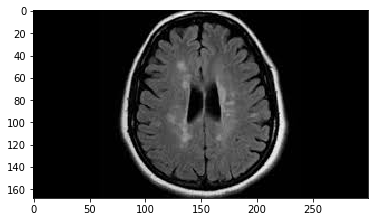

In [ ]:
from matplotlib import image
from matplotlib import pyplot
data = image.imread('no/13 no.jpg')
print(data.dtype)
print(data.shape)
pyplot.imshow(data)
pyplot.show()

(218, 180, 3)
JPEG
RGB
(180, 218)


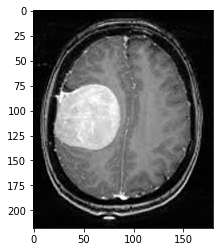

In [ ]:
from PIL import Image
from numpy import asarray
image = Image.open('yes/Y1.jpg')
data = asarray(image)
print(data.shape)
print(image.format)
print(image.mode)
print(image.size)
pyplot.imshow(data)
pyplot.show()

In [ ]:
#loading all the images in a directory
from matplotlib import image
from os import listdir
loaded_images = list()
for filename in listdir('yes'):
    brain_tumor = image.imread('yes/' + filename)
    loaded_images.append(brain_tumor)
    print('>Loaded %s %s' %(filename, brain_tumor.shape))

>Loaded Y1.jpg (218, 180, 3)
>Loaded Y10.jpg (360, 319)
>Loaded Y100.JPG (348, 287, 3)
>Loaded Y101.jpg (336, 300)
>Loaded Y102.jpg (630, 587, 3)
>Loaded Y103.jpg (993, 825, 3)
>Loaded Y104.jpg (890, 700, 3)
>Loaded Y105.jpg (246, 205, 3)
>Loaded Y106.jpg (253, 200, 3)
>Loaded Y107.jpg (512, 512, 3)
>Loaded Y108.jpg (1200, 1059)
>Loaded Y108.png (1200, 1059, 3)
>Loaded Y109.JPG (279, 258, 3)
>Loaded Y11.jpg (369, 400, 3)
>Loaded Y111.JPG (324, 272, 3)
>Loaded Y112.JPG (366, 310, 3)
>Loaded Y113.JPG (312, 254, 3)
>Loaded Y114.JPG (249, 178, 3)
>Loaded Y115.JPG (298, 260, 3)
>Loaded Y116.JPG (269, 249, 3)
>Loaded Y117.JPG (310, 246, 3)
>Loaded Y12.jpg (500, 377)
>Loaded Y120.JPG (245, 224, 3)
>Loaded Y13.jpg (325, 254, 3)
>Loaded Y14.jpg (300, 289)
>Loaded Y146.JPG (355, 311, 3)
>Loaded Y147.JPG (352, 321, 3)
>Loaded Y148.JPG (283, 231, 3)
>Loaded Y15.jpg (380, 310, 3)
>Loaded Y153.jpg (359, 300, 3)
>Loaded Y154.jpg (431, 400, 3)
>Loaded Y155.JPG (355, 310, 3)
>Loaded Y156.JPG (370, 286,

In [ ]:
from matplotlib import image
from os import listdir
loaded_images = list()
for filename in listdir('no'):
    non_tumor = image.imread('no/' + filename)
    loaded_images.append(non_tumor)
    print('>Loaded %s %s' %(filename, non_tumor.shape))

## Saving image into another format

In [ ]:
from PIL import Image
image = Image.open('Yes/Y108.jpg')
image.save('Yes/Y108.png',format='PNG')
up_format = Image.open('Yes/Y108.png')
print(up_format.format)

In [ ]:
#gray scale version of loaded image
from PIL import Image
image = Image.open('Yes/Y108.jpg')
gray_image = image.convert(mode= 'L')
gray_image.save('Yes/Y108.jpg')
_image = Image.open('Yes/Y108.jpg')
_image.show()

In [ ]:
#resize of image
rs_size = Image.open('Yes/Y108.jpg')
image.thumbnail((50,20))
print(image.size)

In [ ]:
def brain_crop(image, plot=False):
   
    # Convert the image to grayscale, and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    

    # Find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    # crop new image out of the original image using the four extreme points (left, right, top, bottom)
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()

        plt.subplot(1, 2, 1)
        plt.imshow(image)
        
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        
        plt.show()
    
    return new_image

#cropping of sample image of tumor-type

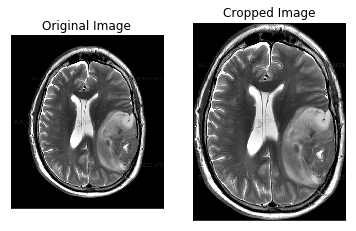

In [ ]:
cp_img = cv2.imread('yes/Y108.jpg')
cp_new_img = brain_crop(cp_img,True)

#cropping of sample image of non tumor type

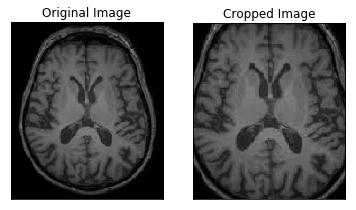

In [ ]:
cp_img = cv2.imread('no/10 no.jpg')
cp_new_img = brain_crop(cp_img,True)

In [ ]:
#cropping a portion of image as segment
image = Image.open('yes/Y8.jpg')

cropped = image.crop((50,100,150,200))
cropped.show()

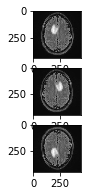

In [ ]:
#Flipping of tumor data
flip_image = Image.open('Yes/Y1.jpg')
#horizontal flip
hoz_flip = image.transpose(Image.FLIP_LEFT_RIGHT)
ver_flip = image.transpose(Image.FLIP_TOP_BOTTOM)

pyplot.subplot(411)
pyplot.imshow(image)

pyplot.subplot(412)
pyplot.imshow(hoz_flip)

pyplot.subplot(413)
pyplot.imshow(ver_flip)
